In [129]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open('data/data/driving_log.csv') as csvfile:
    f = np.array(list(csv.reader(csvfile)))

frames = f[1:,0:4]
print(frames.shape)
print(frames[0])
print(frames[1])
print(frames.shape[0]/24/60)

(8036, 4)
['IMG/center_2016_12_01_13_30_48_287.jpg'
 ' IMG/left_2016_12_01_13_30_48_287.jpg'
 ' IMG/right_2016_12_01_13_30_48_287.jpg' ' 0']
['IMG/center_2016_12_01_13_30_48_404.jpg'
 ' IMG/left_2016_12_01_13_30_48_404.jpg'
 ' IMG/right_2016_12_01_13_30_48_404.jpg' ' 0']
5.580555555555555


In [98]:
def plot_images(images):    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()    

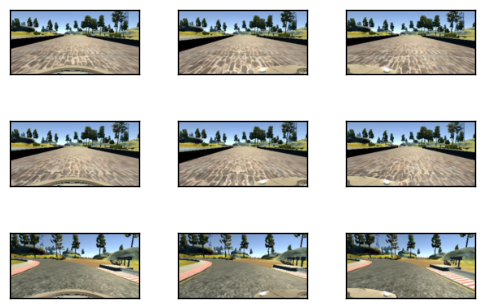

In [123]:
import scipy.misc as sp

def showImg(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
imgs = frames[:,:3]
p1 = np.concatenate([imgs[0],imgs[1],imgs[2]])

def readNplot(plots):
    pes = np.empty(shape=(plots.shape[0],80,160,3), dtype='uint8')
    baseImgDir = 'data/data/'
    for count in range(len(plots)):
        img = mpimg.imread(baseImgDir + plots[count].strip())
        img2 = sp.imresize(img,[80,160])
        pes[count] = img2

    plot_images(pes)

readNplot(p1)

The max, min and zero turn angles noted below were determined in the [steering notebook](steering.ipnb).

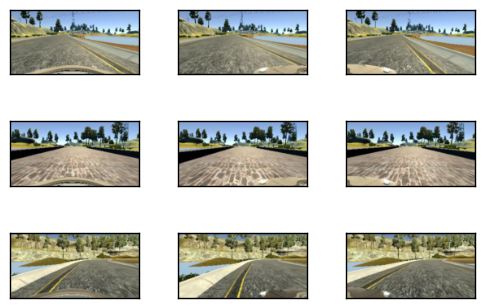

In [125]:
minA = np.array(['IMG/center_2016_12_01_13_39_28_024.jpg', \
       ' IMG/left_2016_12_01_13_39_28_024.jpg', \
       ' IMG/right_2016_12_01_13_39_28_024.jpg', ' -0.9426954'])
maxA = np.array(['IMG/center_2016_12_01_13_38_42_894.jpg', \
       ' IMG/left_2016_12_01_13_38_42_894.jpg', \
       ' IMG/right_2016_12_01_13_38_42_894.jpg', ' 1'])
zeroA = np.array(['IMG/center_2016_12_01_13_30_48_287.jpg', \
       ' IMG/left_2016_12_01_13_30_48_287.jpg', \
       ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0'])
p = np.concatenate([minA[:3], zeroA[:3], maxA[:3]])
readNplot(p)

In [143]:
plts = np.array([minA[0], zeroA[0], maxA[0]])
print(plts)

['IMG/center_2016_12_01_13_39_28_024.jpg'
 'IMG/center_2016_12_01_13_30_48_287.jpg'
 'IMG/center_2016_12_01_13_38_42_894.jpg']


In [157]:
import os
print(f.shape)
print(plts.shape)
imgSet = np.empty(shape=[plts.shape[0]+1,f.shape[1]], dtype='object')
insertLoc = 0
imgSet[insertLoc] = f[0]
insertLoc += 1
fLoc = 0
for f1 in f:
    for p1 in plts:
        if (f1[0].strip() == p1):
            imgSet[insertLoc] = f1
            insertLoc += 1
    
print(imgSet)
dataMainDir = 'minimum'
dataLog = 'driving_log.csv'
dataDir = os.path.join('data', dataMainDir)
dataCsv = os.path.join(dataDir,dataLog)
with open(dataCsv, 'w') as csvfile:
    w = csv.writer(csvfile)
    w.writerow(imgSet)

(8037, 7)
(3,)
[['center' 'left' 'right' 'steering' 'throttle' 'brake' 'speed']
 ['IMG/center_2016_12_01_13_30_48_287.jpg'
  ' IMG/left_2016_12_01_13_30_48_287.jpg'
  ' IMG/right_2016_12_01_13_30_48_287.jpg' ' 0' ' 0' ' 0' ' 22.14829']
 ['IMG/center_2016_12_01_13_38_42_894.jpg'
  ' IMG/left_2016_12_01_13_38_42_894.jpg'
  ' IMG/right_2016_12_01_13_38_42_894.jpg' ' 1' ' 0.4955934' ' 0'
  ' 20.15795']
 ['IMG/center_2016_12_01_13_39_28_024.jpg'
  ' IMG/left_2016_12_01_13_39_28_024.jpg'
  ' IMG/right_2016_12_01_13_39_28_024.jpg' ' -0.9426954' ' 0' ' 0'
  ' 28.11522']]
